In [155]:
# Dependencies
import json
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
from pprint import pprint
import os
from scipy.stats import linregress

In [156]:
# Store filepath in a variable
file_one = os.path.join("Resources", "2015.csv")
file_two = os.path.join("Resources", "2016.csv")
file_three = os.path.join("Resources", "2017.csv")
file_four = os.path.join("Resources", "fertility_rate.csv")
file_five = os.path.join("Resources", "GDP_per_capita.csv")

In [157]:
# Read our Data files with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
happiness_2015_df = pd.read_csv(file_one, encoding="ISO-8859-1")
happiness_2016_df = pd.read_csv(file_two, encoding="ISO-8859-1")
happiness_2017_df = pd.read_csv(file_three, encoding="ISO-8859-1")
fertility_rate_df = pd.read_csv(file_four, encoding="ISO-8859-1")
gdp_per_capita_df = pd.read_csv(file_five, encoding="ISO-8859-1")
democracy_2017_df = pd.read_csv("Resources/Democracy Index by Country 2017.csv")
happiness_2015 = pd.read_csv("Resources/2015.csv")

In [158]:
# Show 5 rows and the header 

happiness_2015_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [159]:
#rename the collumn
happiness_2015_df = happiness_2015_df.loc[:,["Country","Happiness Score"]]

In [160]:
#drop missing values from data frame
gdp_per_capita_df = gdp_per_capita_df.loc[:,["Country Name","2015"]]
gdp_per_capita_df = gdp_per_capita_df.dropna(how='any')
gdp_per_capita_df.head()

,Country Name,2015
1,Afghanistan,569.577923
2,Angola,3695.793748
3,Albania,3934.895394
4,Andorra,36038.267600
5,Arab World,6435.525509


In [161]:
#change the values of a collumn to numeric
gdp_per_capita_df["2015"] = pd.to_numeric(gdp_per_capita_df["2015"])
gdp_per_capita_df.head()

,Country Name,2015
1,Afghanistan,569.577923
2,Angola,3695.793748
3,Albania,3934.895394
4,Andorra,36038.267600
5,Arab World,6435.525509


In [162]:
#rename the collumn
gdp_per_capita_df = gdp_per_capita_df.rename(columns={"2015":"GDP Per Capita 2015"})

In [163]:
#drop missing values from data frame
fertility_rate_df = fertility_rate_df.loc[:,["Country Name","2015"]]
fertility_rate_df = fertility_rate_df.dropna(how='any')
fertility_rate_df.head()

,Country Name,2015
0,Aruba,1.80100
1,Afghanistan,4.80200
2,Angola,5.76600
3,Albania,1.71400
5,Arab World,3.37384


In [164]:
#rename the collumn
fertility_rate_df = fertility_rate_df.rename(columns={"2015":"Birth Rate 2015"})
fertility_rate_df.head()

,Country Name,Birth Rate 2015
0,Aruba,1.80100
1,Afghanistan,4.80200
2,Angola,5.76600
3,Albania,1.71400
5,Arab World,3.37384


In [165]:
#renamethe the collumn
happiness_2015_df = happiness_2015_df.rename(columns={"Country":"Country Name"})
happiness_2015_df.head()

,Country Name,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427


In [166]:
#merge hapiness score and birth rate dataframes
merged_dataframe = pd.merge(happiness_2015_df, fertility_rate_df, on="Country Name")
merged_dataframe.head()

,Country Name,Happiness Score,Birth Rate 2015
0,Switzerland,7.587,1.54
1,Iceland,7.561,1.93
2,Denmark,7.527,1.69
3,Norway,7.522,1.75
4,Canada,7.427,1.60


In [167]:
#merge dataframe with gdp per capita dataframe
merged_dataframe = pd.merge(merged_dataframe, gdp_per_capita_df, on="Country Name")
merged_dataframe.head(5)

,Country Name,Happiness Score,Birth Rate 2015,GDP Per Capita 2015
0,Switzerland,7.587,1.54,82016.02131
1,Iceland,7.561,1.93,50734.44360
2,Denmark,7.527,1.69,53012.99658
3,Norway,7.522,1.75,74498.13764
4,Canada,7.427,1.60,43335.15911


In [168]:
#set the values to numeric
pd.to_numeric(merged_dataframe["GDP Per Capita 2015"], errors='coerce')
pd.to_numeric(merged_dataframe["GDP Per Capita 2015"], errors='coerce')
#organise the dataframe based on GDp per capita from bigest to smallest
organised_df = merged_dataframe.sort_values("GDP Per Capita 2015", ascending=False)
organised_df.head()

,Country Name,Happiness Score,Birth Rate 2015,GDP Per Capita 2015
16,Luxembourg,6.946,1.500,101446.78630
0,Switzerland,7.587,1.540,82016.02131
3,Norway,7.522,1.750,74498.13764
26,Qatar,6.611,1.929,66346.52267
17,Ireland,6.940,1.940,62544.63129


In [169]:
#dataframe reorganised based on hapiness score
organised_df = merged_dataframe.sort_values("Happiness Score", ascending=False)
len(organised_df)

137

In [170]:
organised_df_bottom = organised_df.nsmallest(15,"Happiness Score")
organised_df_bottom.head()

,Country Name,Happiness Score,Birth Rate 2015,GDP Per Capita 2015
136,Togo,2.839,4.517,551.130835
135,Burundi,2.905,5.781,300.676557
134,Benin,3.340,5.048,783.947091
133,Rwanda,3.465,3.967,710.348391
132,Afghanistan,3.575,4.802,569.577923


In [171]:
organised_df_top = organised_df.nlargest(15,"Happiness Score")
organised_df_top.head()

,Country Name,Happiness Score,Birth Rate 2015,GDP Per Capita 2015
0,Switzerland,7.587,1.54,82016.02131
1,Iceland,7.561,1.93,50734.44360
2,Denmark,7.527,1.69,53012.99658
3,Norway,7.522,1.75,74498.13764
4,Canada,7.427,1.60,43335.15911


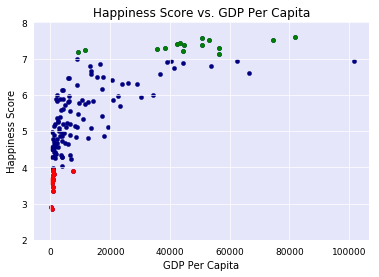

In [172]:

ax = organised_df.plot(
    kind = 'scatter', 
    x = "GDP Per Capita 2015", 
    y = "Happiness Score", 
    color = 'navy',  
    linewidth = 0.2,
    fontsize = 9
)

ax2 = organised_df_top.plot(
    kind = 'scatter', 
    x = "GDP Per Capita 2015", 
    y = "Happiness Score", 
    color = 'green',  
    linewidth = 0.2,
    fontsize = 9,
    ax=ax
)

ax3 = organised_df_bottom.plot(
    kind = 'scatter', 
    x = "GDP Per Capita 2015", 
    y = "Happiness Score", 
    color = 'red',  
    linewidth = 0.2,
    fontsize = 9,
    ax=ax
)

# Titles
ax.set_title("Happiness Score vs. GDP Per Capita")
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Happiness Score')

# Set min/max of x/y axes
# ax.set_xlim(-0.05,1)
ax.set_ylim(2,8)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig('Happiness and GDP Per Capita.png')
plt.show()

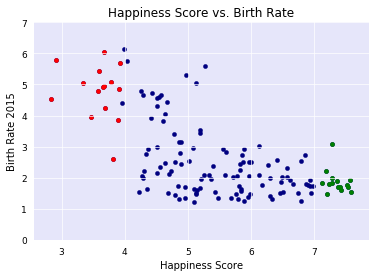

In [173]:
ax = organised_df.plot(
    kind = 'scatter', 
    x = "Happiness Score", 
    y = "Birth Rate 2015", 
    color = 'navy',  
    linewidth = 0.2,
    fontsize = 9
)

ax2 = organised_df_top.plot(
    kind = 'scatter', 
    x = "Happiness Score", 
    y = "Birth Rate 2015", 
    color = 'green',  
    linewidth = 0.2,
    fontsize = 9,
    ax=ax
)

ax3 = organised_df_bottom.plot(
    kind = 'scatter', 
    x = "Happiness Score", 
    y = "Birth Rate 2015", 
    color = 'red',  
    linewidth = 0.2,
    fontsize = 9,
    ax=ax
)

# Titles
ax.set_title("Happiness Score vs. Birth Rate")
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Birth Rate 2015')

# Set min/max of x/y axes
# ax.set_xlim(-0.05,1)
ax.set_ylim(0,7)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig('Happiness and Birth Rate.png')
plt.show()

In [174]:
happiness_2017_top = happiness_2017_df.nsmallest(15, 'Happiness.Rank')
happiness_2017_bottom = happiness_2017_df.nlargest(15, 'Happiness.Rank')
happiness_2017_top.head()
happiness_2017_bottom.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061



There is a medium correlation between trust in government and happiness.


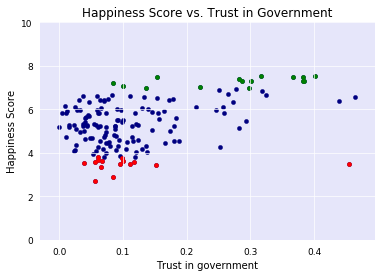

Correlation value: 0.42907973722217224


In [175]:
# PLOT TREND 1: Happiness score vs. Trust in government, 2017 data
ax = happiness_2017_df.plot(
    kind = 'scatter', 
    x = "Trust..Government.Corruption.", 
    y = "Happiness.Score", 
    color = 'navy',  
    linewidth=0.2,
    fontsize = 9
)

ax2 = happiness_2017_top.plot(
    kind = 'scatter', 
    x = "Trust..Government.Corruption.", 
    y = "Happiness.Score", 
    color = 'green',  
    linewidth = 0.2,
    fontsize = 9,
    ax=ax
)

ax3 = happiness_2017_bottom.plot(
    kind = 'scatter', 
    x = "Trust..Government.Corruption.", 
    y = "Happiness.Score", 
    color = 'red',  
    linewidth = 0.2,
    fontsize = 9,
    ax=ax
)

# Titles
ax.set_title("Happiness Score vs. Trust in Government")
ax.set_xlabel('Trust in government')
ax.set_ylabel('Happiness Score')

# Set min/max of x/y axes
# ax.set_xlim(-0.05,1)
ax.set_ylim(0,10)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

print("")
print("There is a medium correlation between trust in government and happiness.")

plt.savefig('Happiness and Trust in Government.png')
plt.show()


correlation = happiness_2017_df['Trust..Government.Corruption.'].corr(happiness_2017_df['Happiness.Score'])
print("Correlation value: " + str(correlation))

In [176]:
happiness_2017_df_change = happiness_2017_df.iloc[:, [0,2,7,8]]
happiness_2017_df_change.head()

,Country,Happiness.Score,Health..Life.Expectancy.,Freedom
0,Norway,7.537,0.796667,0.635423
1,Denmark,7.522,0.792566,0.626007
2,Iceland,7.504,0.833552,0.627163
3,Switzerland,7.494,0.858131,0.620071
4,Finland,7.469,0.809158,0.617951


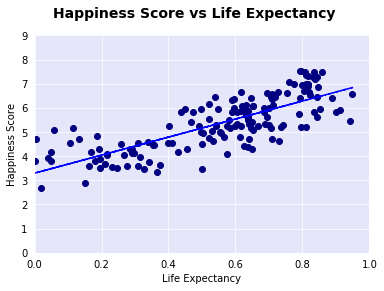

In [177]:
x_axis = happiness_2017_df_change["Health..Life.Expectancy."]
fake = happiness_2017_df_change["Happiness.Score"]

(slope, intercept, _, _, _) = linregress(x_axis, fake)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Happiness Score vs Life Expectancy ", 
fontsize=14, fontweight="bold",)

ax.set_xlim(0, 1)
ax.set_ylim(0, 9)

ax.set_xlabel("Life Expectancy")
ax.set_ylabel("Happiness Score")

ax.plot(x_axis, fake, linewidth=0, marker='o', color='navy', )
ax.plot(x_axis, fit, 'b--')



ax.set_facecolor('lavender')

ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig('Happiness and Life Expectancy.png')
plt.show()


In [178]:
#Merge Happiness and Democracy datasets on "country"
combined_data = pd.merge(happiness_2017_df, democracy_2017_df, how='outer', on="Country")

#Replace all NaN values with 0
combined_data = combined_data.fillna(0)
combined_data = combined_data[combined_data.Category != 0]

combined_data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Rank,Score,Electoral Process and Pluralism,Functioning of Government,Political Participation,Political Culture,Civil Liberties,Category
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1.0,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,5.0,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2.0,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,9.0,9.03,9.58,9.29,7.78,9.38,9.12,Full democracy
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,9.0,9.03,10.00,8.93,7.78,8.75,9.71,Full democracy


In [179]:
#Calculate average "Happiness.Score"
grouped_data = combined_data.groupby(["Category"])
happiness_score = grouped_data.mean()["Happiness.Score"]
happiness_score

Category
Authoritarian       3.658327
Flawed democracy    4.972474
Full democracy      7.032895
Hybrid regime       4.398897
Name: Happiness.Score, dtype: float64

In [180]:
happiness_score.values

array([3.65832691, 4.97247368, 7.03289476, 4.39889745])

In [181]:
happiness_score.index

Index(['Authoritarian', 'Flawed democracy', 'Full democracy', 'Hybrid regime'], dtype='object', name='Category')

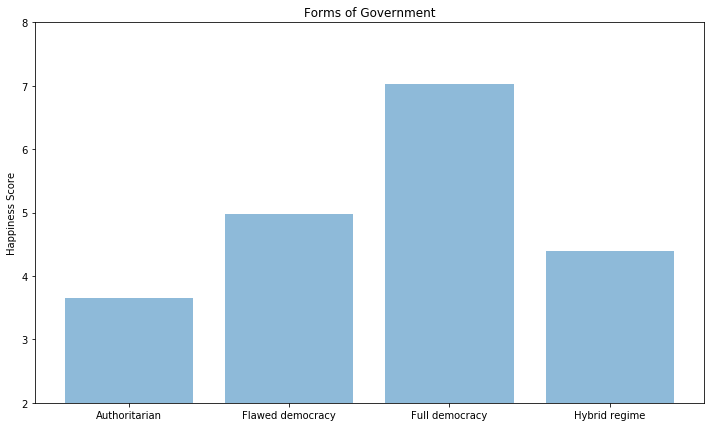

In [182]:
#Create bar chart
plt.figure(figsize=(12,7))
plt.bar(happiness_score.index, happiness_score.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(happiness_score)),happiness_score.index)
plt.ylim(2, 8)

plt.title('Forms of Government')
plt.ylabel("Happiness Score")
plt.savefig('Happiness and Forms of Government.png')
plt.show()

In [183]:
#Calculate average "Happiness.Score"
region_happiness = happiness_2015.groupby(["Region"])
happiness_score = region_happiness.mean()["Happiness Score"]
happiness_score

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [184]:
happiness_score.values

array([7.285     , 5.33293103, 5.62616667, 6.14468182, 5.4069    ,
       7.273     , 5.31744444, 4.58085714, 4.2028    , 6.68961905])

In [185]:
happiness_score.index

Index(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object', name='Region')

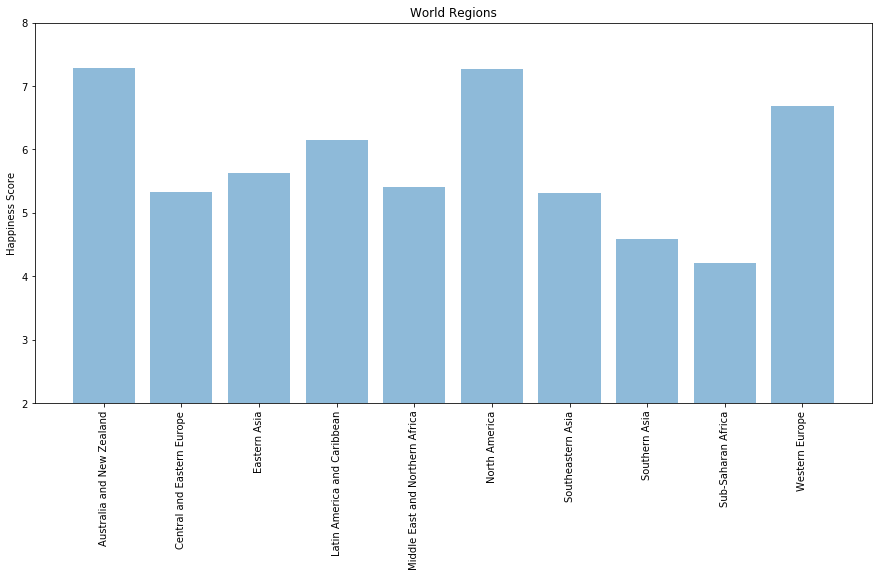

In [186]:
#Create bar chart
plt.figure(figsize=(15,7))
plt.bar(happiness_score.index, happiness_score.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(happiness_score)),happiness_score.index)
plt.ylim(2, 8)
plt.xticks(rotation='vertical')


plt.title('World Regions')
plt.ylabel("Happiness Score")
plt.savefig('Happiness and World Regions.png')
plt.show()

In [ ]:
#Excract data to csv
writer = pd.ExcelWriter('Happiness_Data.xlsx')
organised_df.to_excel(writer, index=False, sheet_name='Happiness_Data')